In [1]:
from matplotlib import pyplot as plt
from math import cos, sin, pi

import numpy as np
import SimpleITK as sitk
from gvxrPython3 import gvxr

Thu May  9 17:23:20 2024 (WW) Spekpy is not installed, try Xpecgen instead.
Thu May  9 17:23:20 2024 (WW) Xpecgen is not installed either.


In [2]:
angle = pi * 2 / 3
half_length = 10
a = [-half_length, -half_length, 0]
b = [ half_length, -half_length, 0]
c = [ half_length,  half_length, 0]
d = [-half_length,  half_length, 0]

(-15.0, 15.0)

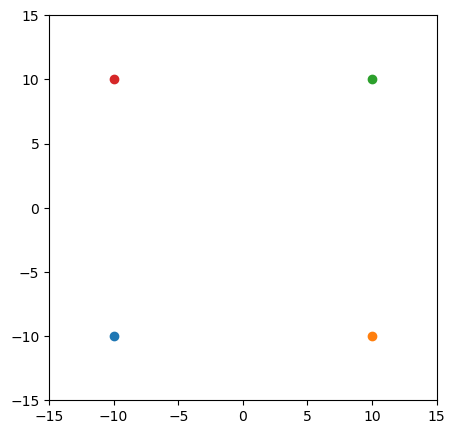

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(a[0], a[1])
plt.scatter(b[0], b[1])
plt.scatter(c[0], c[1])
plt.scatter(d[0], d[1])
plt.xlim(-half_length - 5, half_length + 5)
plt.ylim(-half_length - 5, half_length + 5)

In [4]:
number_of_voxels = [150, 150, 150]
spacing = 0.5, 0.5, 0.5
volume_points = np.array(gvxr.computeDensity(number_of_voxels[0], number_of_voxels[1], number_of_voxels[2],
                             0, 0, 0,
                             spacing[0], spacing[1], spacing[2],
                             "mm",
                             [a[0], a[1], a[2], b[0], b[1], b[2], c[0], c[1], c[2], d[0], d[1], d[2]],
                             ["METABALL", "METABALL", "METABALL", "METABALL"],
                             [10, 20, 10, 20, 10, 20, 10, 20],
                             [], [], []));

volume_points -= volume_points.min()
volume_points /= volume_points.max()
volume_points *= 2
volume_points -= 1
volume_points *= 30000
volume_points = volume_points.astype(np.int16)

Control point: -10, -10, 0 META_BALL 10   20
Control point: 10, -10, 0 META_BALL 10   20
Control point: 10, 10, 0 META_BALL 10   20
Control point: -10, 10, 0 META_BALL 10   20


In [5]:
sitk_image = sitk.GetImageFromArray(volume_points);
sitk_image.SetSpacing(spacing);
sitk.WriteImage(sitk_image, "output_data/implicit_function-points.mha")

In [6]:
number_of_voxels = [150, 150, 150]
spacing = 0.5, 0.5, 0.5
volume_lines = np.array(gvxr.computeDensity(number_of_voxels[0], number_of_voxels[1], number_of_voxels[2],
                             0, 0, 0,
                             spacing[0], spacing[1], spacing[2],
                             "mm",
                             [0, 0, 0], ["METABALL"], [15, 1],
                             
                             [
                                  a[0], a[1], a[2], b[0], b[1], b[2], 
                                  b[0], b[1], b[2], c[0], c[1], c[2], 
                                  c[0], c[1], c[2], d[0], d[1], d[2],
                                  d[0], d[1], d[2], a[0], a[1], a[2]
                             ],
                                 
                             ["METABALL", "METABALL", "METABALL", "METABALL", "METABALL"],
                             [10, 20, 10, 20, 10, 20, 10, 20]));

volume_lines -= volume_lines.min()
volume_lines /= volume_lines.max()
volume_lines *= 2
volume_lines -= 1
volume_lines *= 30000
volume_lines = volume_lines.astype(np.int16)

Control point: 0, 0, 0 META_BALL 15   1


In [7]:
sitk_image = sitk.GetImageFromArray(volume_lines);
sitk_image.SetSpacing(spacing);
sitk.WriteImage(sitk_image, "output_data/implicit_function-lines.mha")

In [8]:
# Create an OpenGL context
print("Create an OpenGL context")
gvxr.createOpenGLContext();

Create an OpenGL context


Thu May  9 17:23:22 2024 ---- Create window (ID: -1)
Thu May  9 17:23:22 2024 ---- Request an interactive OpenGL context
Thu May  9 17:23:22 2024 ---- Initialise GLFW
Thu May  9 17:23:22 2024 ---- Create an OpenGL window with a 3.2 context.
Thu May  9 17:23:22 2024 ---- Make the window's context current
Thu May  9 17:23:22 2024 ---- Initialise GLEW
Thu May  9 17:23:22 2024 ---- OpenGL vendor: NVIDIA Corporation
Thu May  9 17:23:22 2024 ---- OpenGL renderer: NVIDIA GeForce RTX 4060 Ti/PCIe/SSE2
Thu May  9 17:23:22 2024 ---- OpenGL version: 3.2.0 NVIDIA 545.23.08
Thu May  9 17:23:22 2024 ---- Use OpenGL 4.5.
Thu May  9 17:23:22 2024 ---- Initialise the X-ray renderer if needed and if possible


In [9]:
# Create a source
print("Set up the beam")
gvxr.setSourcePosition(-40.0,  0.0, 0.0, "cm");
gvxr.usePointSource();
#  For a parallel source, use gvxr.useParallelBeam();

Set up the beam


In [10]:
# Set its spectrum, here a monochromatic beam
# 1000 photons of 80 keV (i.e. 0.08 MeV) per ray
gvxr.setMonoChromatic(0.08, "MeV", 1000);
# The following is equivalent: gvxr.setMonoChromatic(80, "keV", 1000);

In [11]:
# Set up the detector
print("Set up the detector");
gvxr.setDetectorPosition(10.0, 0.0, 0.0, "cm");
gvxr.setDetectorUpVector(0, 0, -1);
gvxr.setDetectorNumberOfPixels(640, 320);
gvxr.setDetectorPixelSize(0.5, 0.5, "mm");

Set up the detector


Thu May  9 17:23:22 2024 ---- Initialise the renderer


In [ ]:
gvxr.renderLoop()

In [12]:
for i in range(0, 22000, 2000):

    gvxr.removePolygonMeshesFromSceneGraph()
    
    iso_value = i
    
    gvxr.makeIsoSurface("points",
        iso_value,
        volume_points.flatten(),
        number_of_voxels[0], number_of_voxels[1], number_of_voxels[2],
        spacing[0], spacing[1], spacing[2],
        "cm");

    gvxr.makeIsoSurface("lines",
        iso_value,
        volume_lines.flatten(),
        number_of_voxels[0], number_of_voxels[1], number_of_voxels[2],
        spacing[0], spacing[1], spacing[2],
        "cm");

    gvxr.rotateNode("points", 90, 0, 1, 0);
    gvxr.rotateNode("lines", -90, 0, 1, 0);

    # Titanium Aluminum Vanadium Alloy
    gvxr.setMixture("points", "Ti90Al6V4")
    gvxr.setDensity("points", 4.43, "g/cm3")

    gvxr.setMixture("lines", "Ti90Al6V4")
    gvxr.setDensity("lines", 4.43, "g/cm3")
    
    gvxr.addPolygonMeshAsInnerSurface("points")    
    gvxr.addPolygonMeshAsInnerSurface("lines")    

    # Compute an X-ray image
    # We convert the array in a Numpy structure and store the data using single-precision floating-point numbers.
    x_ray_image = np.array(gvxr.computeXRayImage()).astype(np.single)
    
    # Update the visualisation window
    gvxr.displayScene()